# L3: Large Multimodal Models (LMMs)

This project demonstrates the use of **Large Multimodal Models (LMMs)** to analyze **images** combined with **text prompts**. The system leverages generative AI models to process uploaded images and respond to user-defined questions or instructions, providing insights based on both visual and textual inputs.

## Key Features

1. **Image and Text Integration**:
   - Upload an image and provide a text-based prompt.
   - The model processes the image and the prompt together to generate context-aware responses.

2. **Versatile Applications**:
   - Analyze charts and provide explanations for data trends.
   - Decode hidden messages in images.
   - Answer questions about image content.

3. **Visual Representation**:
   - Explore how the model perceives and processes the uploaded images, including transformations to enhance hidden or subtle details.


* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai

```

Note: don't forget to set up your GOOGLE_API_KEY to use the Gemini Vision model in the env file.
```
   %env GOOGLE_API_KEY=************
```
Check the [documentation](https://ai.google.dev/gemini-api/docs/api-key) for more infomation.

In [11]:
import warnings
warnings.filterwarnings('ignore')

## Setup
### Load environment variables and API keys

In [12]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

In [13]:
# Set the genai library
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
        api_key=GOOGLE_API_KEY,
        transport="rest",
        client_options=ClientOptions(
            api_endpoint=os.getenv("GOOGLE_API_BASE"),
        ),
)

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Helper functions

In [14]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [34]:
def call_LMM(image_path: str, prompt: str) -> str:
    # Load the image
    img = PIL.Image.open(image_path)
    # Call generative model
    model = genai.GenerativeModel('gemini-1.5-flash')
    # "\n\n" serves as a separator between the image and text, providing the model with a clear contextual boundary to ensure that the generated output is more accurate and logically coherent.
    response = model.generate_content([img,"\n\n", prompt])
    #response = model.generate_content([img,"\n\n", prompt], stream=True)
    #response.resolve()
    return to_markdown(response.text)  

## Analyze images with an LMM

In [35]:
# Pass in an image and see if the LMM can answer questions about it
Image(url= "SP-500-Index-Historical-Chart.jpg")

In [36]:
# Use the LMM function
call_LMM("SP-500-Index-Historical-Chart.jpg", 
    "Explain what you see in this image.")

> This image shows a line graph depicting the historical performance of the S&P 500 index from 1960 to 2020.  The x-axis represents the year, and the y-axis represents the index value. The line shows a generally upward trend, indicating long-term growth in the S&P 500 over this period, although with periods of fluctuation and dips reflecting market volatility.  The graph clearly illustrates the significant increase in the index's value over the six decades.


## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

In [37]:
Image(url= "clip.png")

In [38]:
call_LMM("clip.png", 
    "Explain what this figure is and where is this used.")

> This figure depicts the contrastive pre-training process used in multimodal models, specifically those that aim to understand the relationship between images and text. Let's break down the components:
> 
> **1. Data Input:**
> 
> * **Image Data:** A set of images (represented by a stack of images of an Aussie puppy) is fed into the system.
> * **Text Data:** Corresponding text descriptions for the images (e.g., "Pepper the Aussie pup") are also input.  These are usually multiple descriptions per image to capture semantic variations.
> 
> **2. Encoding:**
> 
> * **Image Encoder:** This neural network processes the images and transforms them into a numerical representation (feature vector, I1, I2, I3... IN) that captures their visual essence.
> * **Text Encoder:** This neural network processes the text descriptions and transforms them into a similar numerical representation (feature vector, T1, T2, T3... TN), capturing the semantic meaning.
> 
> **3. Contrastive Learning:**
> 
> * **Pairwise Comparisons:** The core idea is to learn embeddings (numerical representations) such that images and their associated text descriptions are closer together in the embedding space than images and unrelated text descriptions.  This is done by comparing all image embeddings (I1...IN) with all text embeddings (T1...TN).
> * **Matrix of Comparisons:** The resulting matrix shows the comparison of each image embedding with each text embedding.  The lighter blue squares highlight positive pairs (image and its correct caption);  implicitly the rest are considered negative pairs (image and incorrect captions).
> * **Loss Function:** A loss function (not explicitly shown) measures the distance between the embeddings. The training process aims to minimize the distance between related image-text pairs while maximizing the distance between unrelated pairs.
> 
> **Where this is used:**
> 
> This contrastive pre-training approach is used to build large-scale multimodal models, which can then be fine-tuned for downstream tasks such as:
> 
> * **Image Captioning:** Generating textual descriptions of images.
> * **Image Retrieval:** Finding images based on text queries.
> * **Visual Question Answering (VQA):** Answering questions about images.
> * **Multimodal Search:** Search across both images and text data.
> 
> In essence, the pre-training creates a model that has learned a rich understanding of the relationship between visual and textual information, enabling it to perform well on various tasks where both image and text are involved.  The pre-trained model can then be fine-tuned for a more specific task using smaller, task-specific datasets.


## Decode the hidden message

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access the files for this notebook, 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


In [39]:
Image(url= "blankimage3.png")

In [40]:
# Ask to find the hidden message
call_LMM("blankimage3.png", 
    "Read what you see on this image.")

> Here's what the image says:
> 
> You can vectorize
> the whole world
> with Weaviate!

## How the model sees the picture!

> You have to be careful! The model does not "see" in the same way that we see!

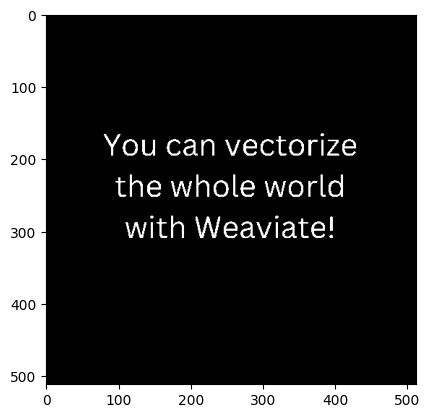

In [41]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

image = imageio.imread("blankimage3.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');

### Try it yourself!

**EXTRA!**  You can use the function below to create your own hidden message, into an image:

In [42]:
# Create a hidden text in an image
def create_image_with_text(text, font_size=20, font_family='sans-serif', text_color='#73D955', background_color='#7ED957'):
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor(background_color)
    ax.text(0.5, 0.5, text, fontsize=font_size, ha='center', va='center', color=text_color, fontfamily=font_family)
    ax.axis('off')
    plt.tight_layout()
    return fig

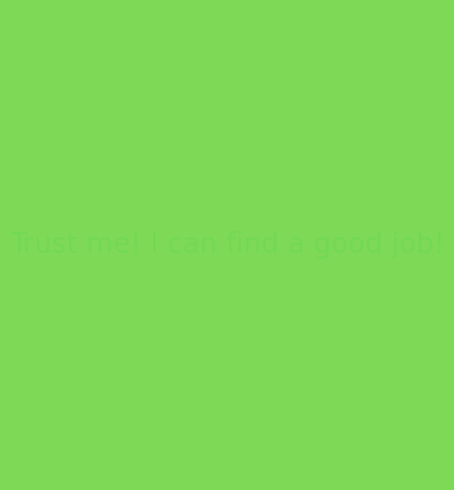

In [43]:
# Modify the text here to create a new hidden message image!
fig = create_image_with_text("Trust me! I can find a good job!") 

# Plot the image with the hidden message
plt.show()
fig.savefig("extra_output_image.png")

In [44]:
# Call the LMM function with the image just generated
call_LMM("extra_output_image.png", 
    "Read what you see on this image.")

> Here's what the image says:
> 
> Trust me! I can find a good job!


* It worked!, now plot the image decoding the message.

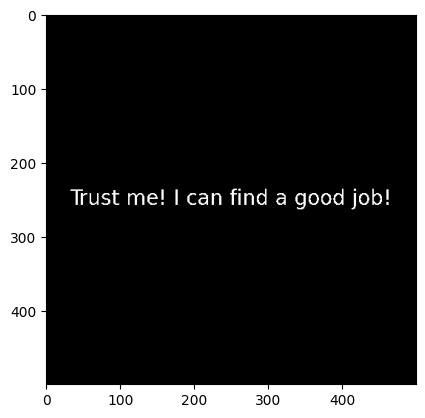

In [45]:
image = imageio.imread("extra_output_image.png")

# Convert the image to a NumPy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');